# Домашнее задание №2

# Выполнил Салабай В.Р.(ФПэ-01-22)

Задача №1 
Построить график зависимости термического КПД от давления промежуточного перегрева водяного пара для условий примера: Р_0 = 12 МПа; t_0=530 °;P_k
=5 кПа. Параметры промперегре вP_п
=1, 2, 3, 4, 5, 6 ,ПаМt и Пап
=530 °С.

In [1]:
#Загружаем библиотеки
import matplotlib.pyplot as plt
import numpy as np
import iapws 
from iapws import IAPWS97 as gas

In [2]:
#СИ 
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
grad_Cels = 1

In [3]:
#Создаем массивы давления и температуры
p_O = 12 * MPa
p_k = 5 * kPa
t_O = 530 * grad_Cels
p_nn = np.array([1, 2, 3, 4, 5, 6])
t_nn = 530 * grad_Cels

In [4]:
kpd = []
for P_nn in p_nn:
    point0_start = gas(P = p_O * unit, T=(t_O + 273.15))
    point0_end = gas(P = P_nn, s=point0_start.s)
    point1_start = gas(P = P_nn, T= (t_nn + 273.15))
    point_condensator = gas(P = p_k * unit, s=point1_start.s)
    point_nasos = gas(P = p_k * unit, x=0)
    poleznaya_energiya = (point0_start.h - point0_end.h) + (point1_start.h - point_condensator.h)
    polnaya_energiya = (point0_start.h - point_nasos.h) + (point1_start.h - point0_end.h)
    kpd_znachenie = (poleznaya_energiya / polnaya_energiya)*100
    kpd.append(kpd_znachenie)
        

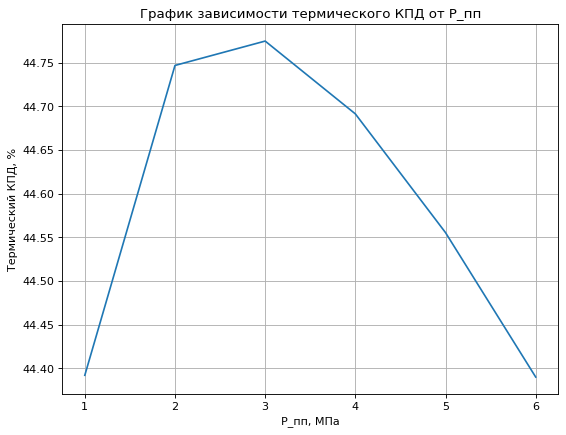

In [5]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(p_nn,kpd, label=f"При P_пп = {p_nn} (КПа)")
plt.title("График зависимости термического КПД от P_пп")
plt.xlabel("P_пп, МПа")
plt.ylabel("Термический КПД, %")
plt.grid()

# --------------------------------------------------------------------------------------

Задача №2
Построить график изолиний термического КПД в зависимости от давления промежуточного перегрева и
начальной температуры для Р_0$=12 МПа;
𝑡0=530 °С; Рк=5 кПа. Покрыть график множеством максимумов КПД.

In [6]:
#Загружаем библиотеки
import matplotlib.pyplot as plt
import numpy as np
import iapws 
from iapws import IAPWS97 as gas

In [11]:
def kpd(p_O,t_O,P_nn,t_nn,p_k):
    point0_start = gas(P = p_O*unit, T=(t_O+273.15))
    point0_end = gas(P = p_nn, s = point0_start.s)
    point1_start = gas(P = p_nn, T = (t_nn+273.15))
    point_condensator = gas(P = p_k*unit, s = point1_start.s)
    point_nasos = gas(P = p_k*unit, x = 0)
    poleznaya_energiya = (point0_start.h - point0_end.h) + (point1_start.h - point_condensator.h)
    polnaya_energiya = point0_start.h - point_nasos.h + point1_start.h - point0_end.h
    kpd = (poleznaya_energiya / polnaya_energiya)*100
    return kpd

In [12]:
p_O = 12 * MPa
t_O = 530 
p_k = 5 * kPa
point1_start = []
P_nn = [] 

In [13]:
# Заполним массив давлений промежуточного перегрева
P_nn.append(p_k*unit)
for i in range(0,12):
    P_nn.append((i+1))

point0_start = gas(P = p_O * unit, T=(t_O+273.15))
point0_end = gas(P = P_nn[0], s = point0_start.s)

# Заполним массив температур промежуточного перегрева
point1_start.append(point0_end.T)
for i in range(0,len(P_nn)-1):
    point1_start.append(300+20*(i+1))

In [14]:
KPD = {}
for t_nn in point1_start:
    kpd_znachenie = []
    for p_nn in P_nn:
        kpd_znachenie.append(kpd(p_O,t_O,p_nn,t_nn,p_k))
    KPD[t_nn] = kpd_znachenie

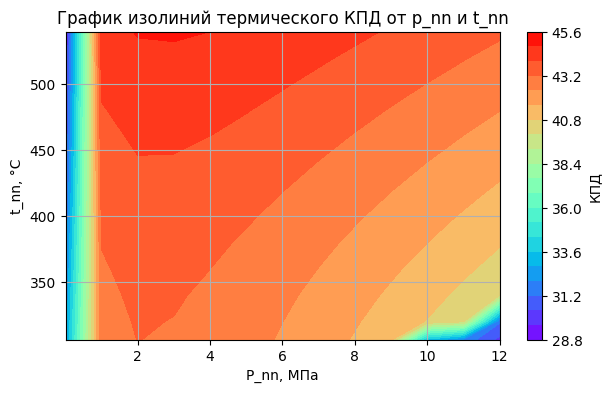

In [18]:
fig = plt.figure(figsize=(7, 4))
axis = fig.add_subplot()

cs = axis.contourf(P_nn, point1_start, KPD.values(), cmap = 'rainbow', levels = 20)
plt.title('График изолиний термического КПД от p_nn и t_nn', )
plt.xlabel('P_nn, МПа')
plt.ylabel('t_nn, °C')
plt.grid(True)

cbar = fig.colorbar(cs)
cbar.set_label('КПД')

plt.show()

# ---------------------------------------------------------------------------------------

Задача №3
При удельных расходах водяного пара d_01 = 2,9 кг/(кВт·ч) и d_02 
= 3,4 кг/(кВт·ч) оценить удельные расходы теплоты на выработку электроэнергии, приняв разность энтальп и_0-
_п.в 
 = 2400 кДж/кг.

In [228]:
d_ob= [2.9, 3.4] # (кг/(кВт*ч))
h0_h = 2400 # (кДж/кг)

In [378]:
for m in d_ob:
    Q = m * h0_h /3600
    print('Удельный расход теплоты при расходе на электроэнергию d_ob = {m} (кг/(кВт*ч)) Q = {round(Q,3)} кг/кВт*ч')

Удельный расход теплоты при расходе на электроэнергию d_ob = {m} (кг/(кВт*ч)) Q = {round(Q,3)} кг/кВт*ч
Удельный расход теплоты при расходе на электроэнергию d_ob = {m} (кг/(кВт*ч)) Q = {round(Q,3)} кг/кВт*ч


# ----------------------------------------------------------------------------------------

Задача № 4 
Написать код для решения задачи оптимизации параметров промежуточного перегрева Pпп и tпп для свободных начальных параметров Р0,t0,Рк .Сделаем допущение, что начальная точка процесса расширения всегда находится в зоне перегретого пара. Решение должно выдавать параметры промежуточного перегрева и термический КПД при них. На основе этого кода собрать информацию об оптимальных давлениях промежуточного перегрева и температуры при P0 от 5 до 12 МПа с шагом 1 МПа и температурой t0= 500 °С, Рк=5 кПа. Сделать график функции оптимального давления промежуточного перегрева от давления 

In [403]:
import iapws
from iapws import IAPWS97 as gas
from scipy.optimize import minimize
import numpy as np
import numpy

In [404]:
#СИ
MPa = 10 ** 6
kPa = 10 ** 3
mpa_to_unit = 1 / MPa
kelvin = lambda x: x + 273.15 if x else None

In [405]:
#Определение параметров точек цикла 
def chet_points(p_0: float, p_k: float,
    t_0: float, p_prom: float, t_prom: float):
        
    point0_start = gas(T=t_0, P=p_0)
    point0_end = gas(P=p_prom, s=point0_start.s)
    point1_start = gas(P=p_prom, T=t_prom)
    point_condensator = gas(P=p_k * mpa_to_unit, s=point1_start.s)
    point_nasos = gas(P=p_k * mpa_to_unit, x=0)

    return point0_start, point0_end, point1_start, point_condensator, point_nasos

# Функция вычисляет термический КПД паротурбинной установки
def chet_kpd(point0_start, point0_end, point1_start, point_condensator, point_nasos) -> float:
    poleznaya_energiya = (point0_start.h - point0_end.h) + (point1_start.h - point_condensator.h)
    full_energy = (point0_start.h - point_nasos.h) + (point1_start.h - point0_end.h)
    return poleznaya_energiya / full_energy

In [406]:
#Определение оптимальных параматров промперегрева
def optimal_parametres( p_0: float, t_0: float, p_k: float) -> (float, float):
    def loss_function(middle_parametres, p_0 = p_0, t_0 = t_0, p_k = p_k):
        p_div_p_0, t_div_t_0 = middle_parametres[0], middle_parametres[1]
        p_prom = p_0 * p_div_p_0
        t_prom = t_0 * t_div_t_0
        point0_start, point0_end, point1_start, point_condensator, point_nasos = chet_points(
            p_0=p_0,
            p_k=p_k,
            t_0=kelvin(t_0),
            p_prom=p_prom,
            t_prom=kelvin(t_prom)
        )
        kpd = chet_kpd(point0_start, point0_end, point1_start, point_condensator, point_nasos)
        return 1 - kpd

    initial_parametres = np.array([0.5, 0.5]) # Задаем первоночальное приближение 
    bounds = ((0.01, 1), (0.01, 1)) # Ограничения 
    result = minimize(loss_function, x0 = initial_parametres, bounds = bounds, tol = 1e-8)
    p_div_p_0, t_div_t_0 = result.x
    p_prom = p_div_p_0 * p_0 
    t_prom = t_div_t_0 * t_0 
    return p_prom, t_prom

При p_0 = 5 МПа давление промперегрева 0.945 МПа
Температура промперегрева 500.0 °C
--------------------------------------------------------------------
При p_0 = 6 МПа давление промперегрева 1.199 МПа
Температура промперегрева 500.0 °C
--------------------------------------------------------------------
При p_0 = 7 МПа давление промперегрева 1.47 МПа
Температура промперегрева 500.0 °C
--------------------------------------------------------------------
При p_0 = 8 МПа давление промперегрева 1.754 МПа
Температура промперегрева 500.0 °C
--------------------------------------------------------------------
При p_0 = 9 МПа давление промперегрева 2.052 МПа
Температура промперегрева 500.0 °C
--------------------------------------------------------------------
При p_0 = 10 МПа давление промперегрева 2.363 МПа
Температура промперегрева 500.0 °C
--------------------------------------------------------------------
При p_0 = 11 МПа давление промперегрева 2.687 МПа
Температура промперегрева 500.0 

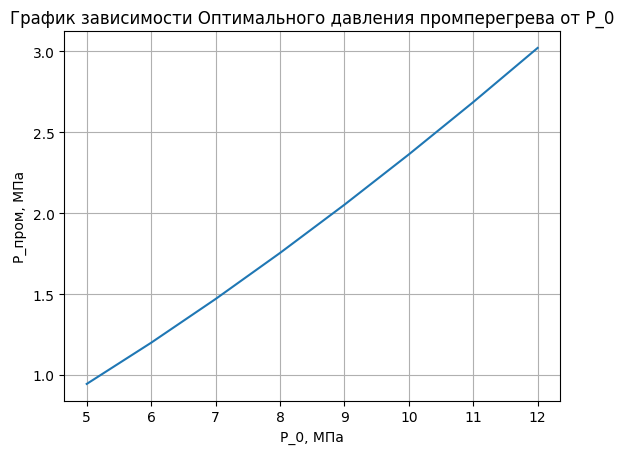

In [407]:
#Рассчитываем
p_0 = range(5, 13)
t_0 = 500 #°C
p_k = 5 * kPa
p_pr = []
for p in p_0:
    p_prom, t_prom = (optimal_parametres(p,t_0,p_k))
    p_pr.append(p_prom)
    print(f"""При p_0 = {p} МПа давление промперегрева {round(p_prom, 3)} МПа
Температура промперегрева {t_prom} °C""")
    print(f"--------------------------------------------------------------------""")
plt.plot(p_0,p_pr)
plt.title("График зависимости Оптимального давления промперегрева от P_0")
plt.xlabel("P_0, МПа")
plt.ylabel("P_пром, МПа")
plt.grid()
    